In [1]:
# Import libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Company_Data.csv')
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [4]:
# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [7]:
df.describe(include = 'O')

ShelveLoc Urban   US
count        400   400  400
unique         3     2    2
top       Medium   Yes  Yes
freq         219   282  258

In [8]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [9]:
df[df.duplicated()]

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []

In [10]:
# Data Visualization

In [13]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

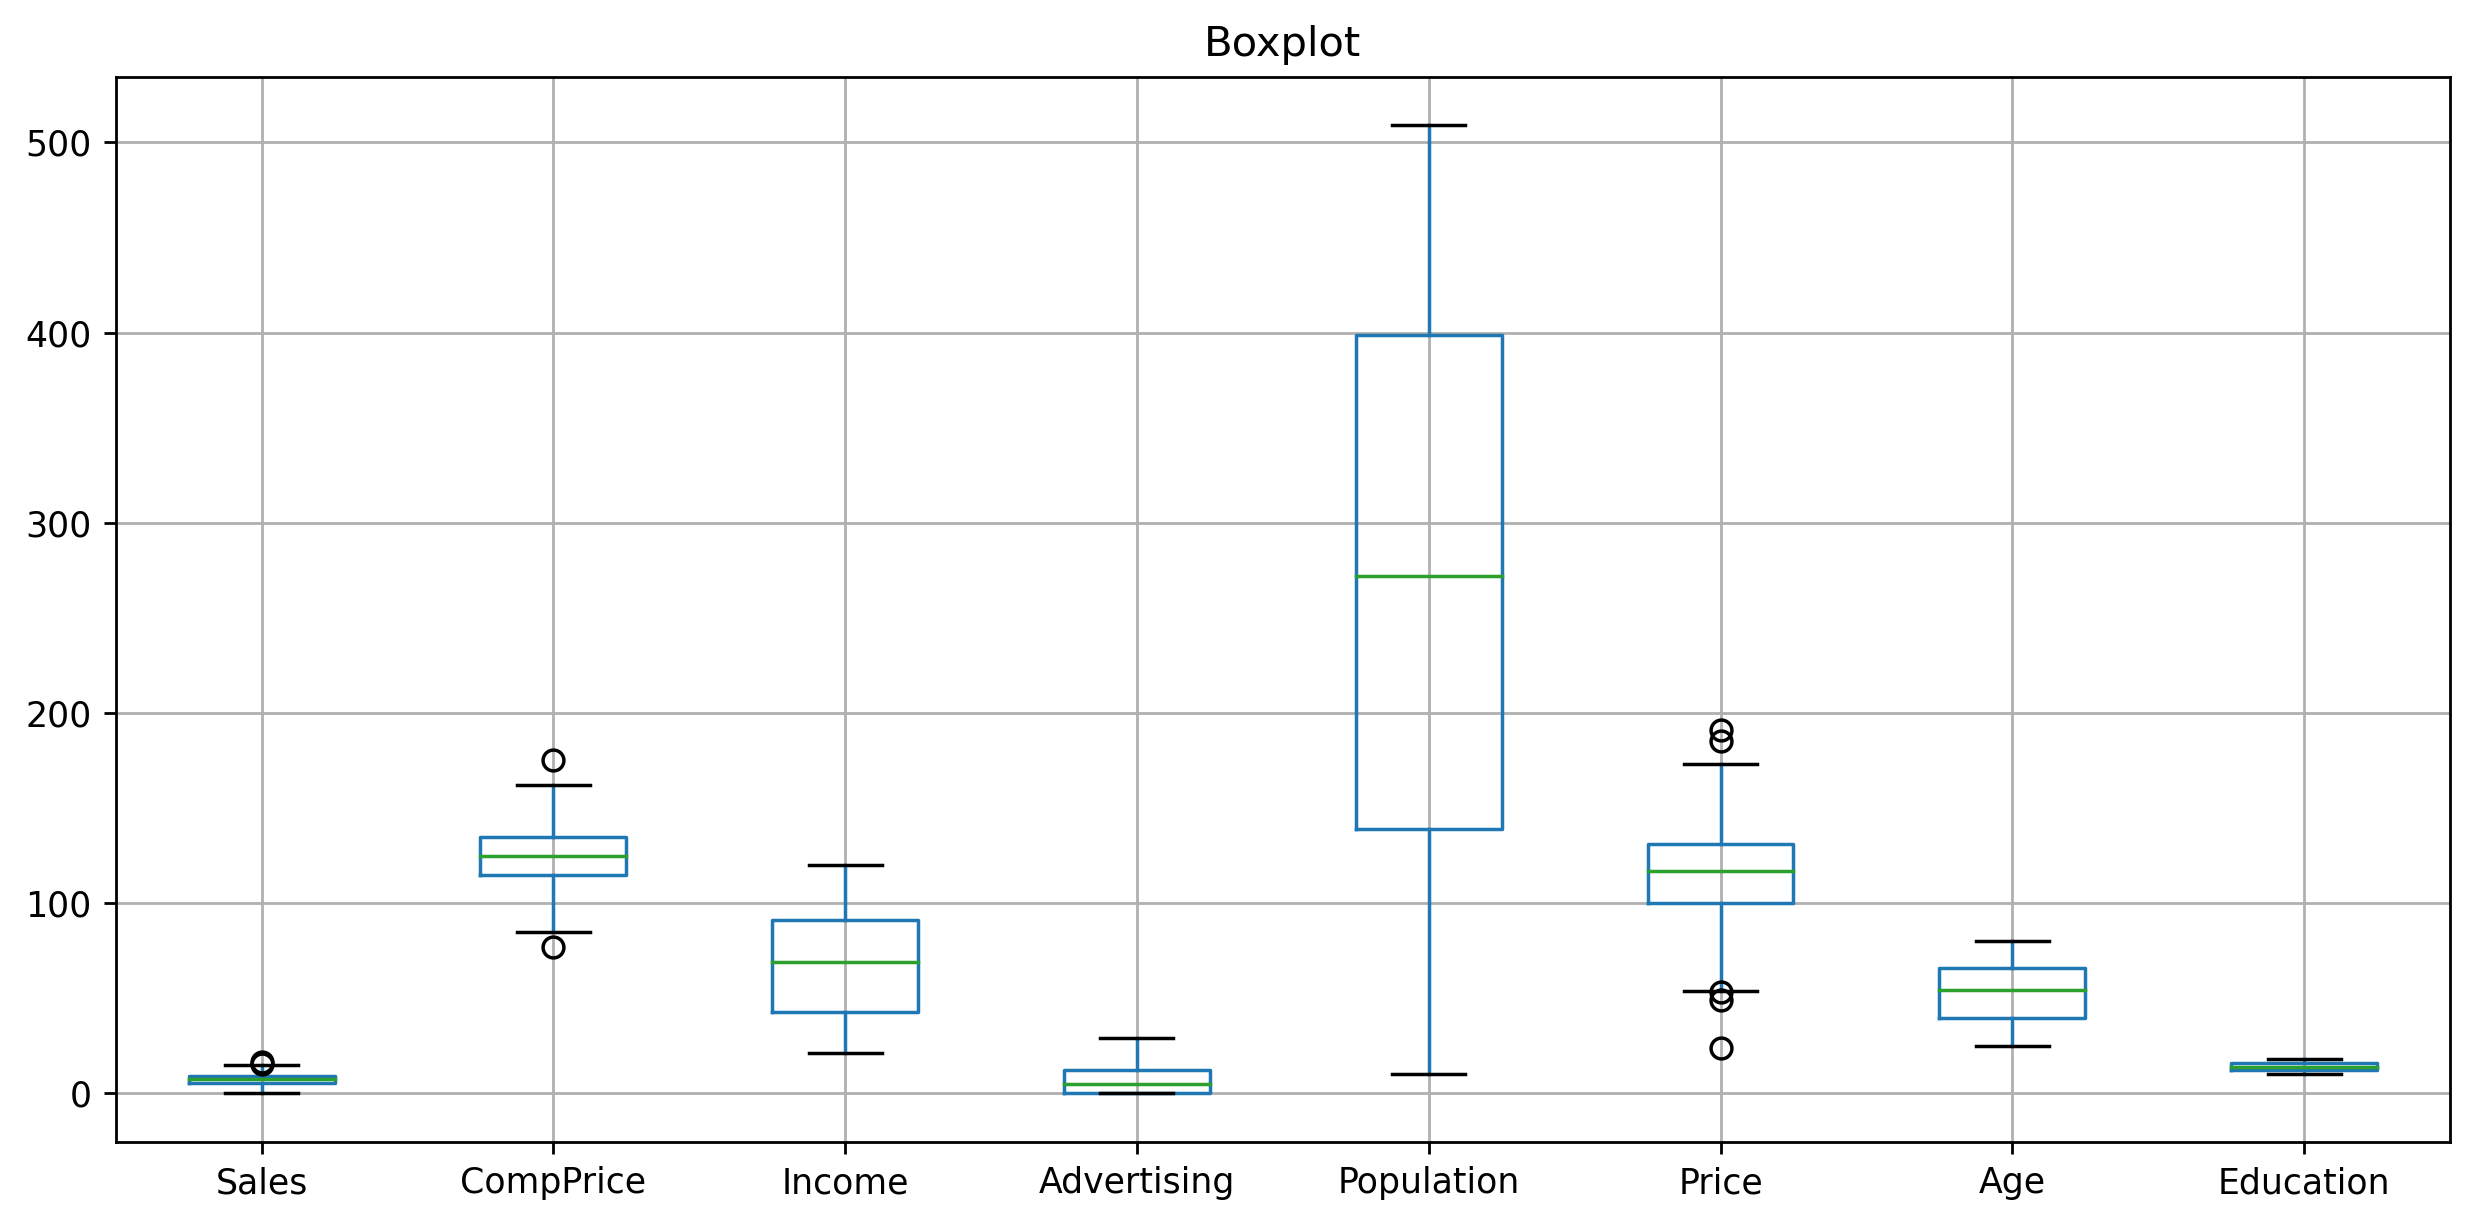

In [14]:
df.boxplot()
plt.title('Boxplot')
plt.tight_layout()

<AxesSubplot:xlabel='Sales', ylabel='Count'>

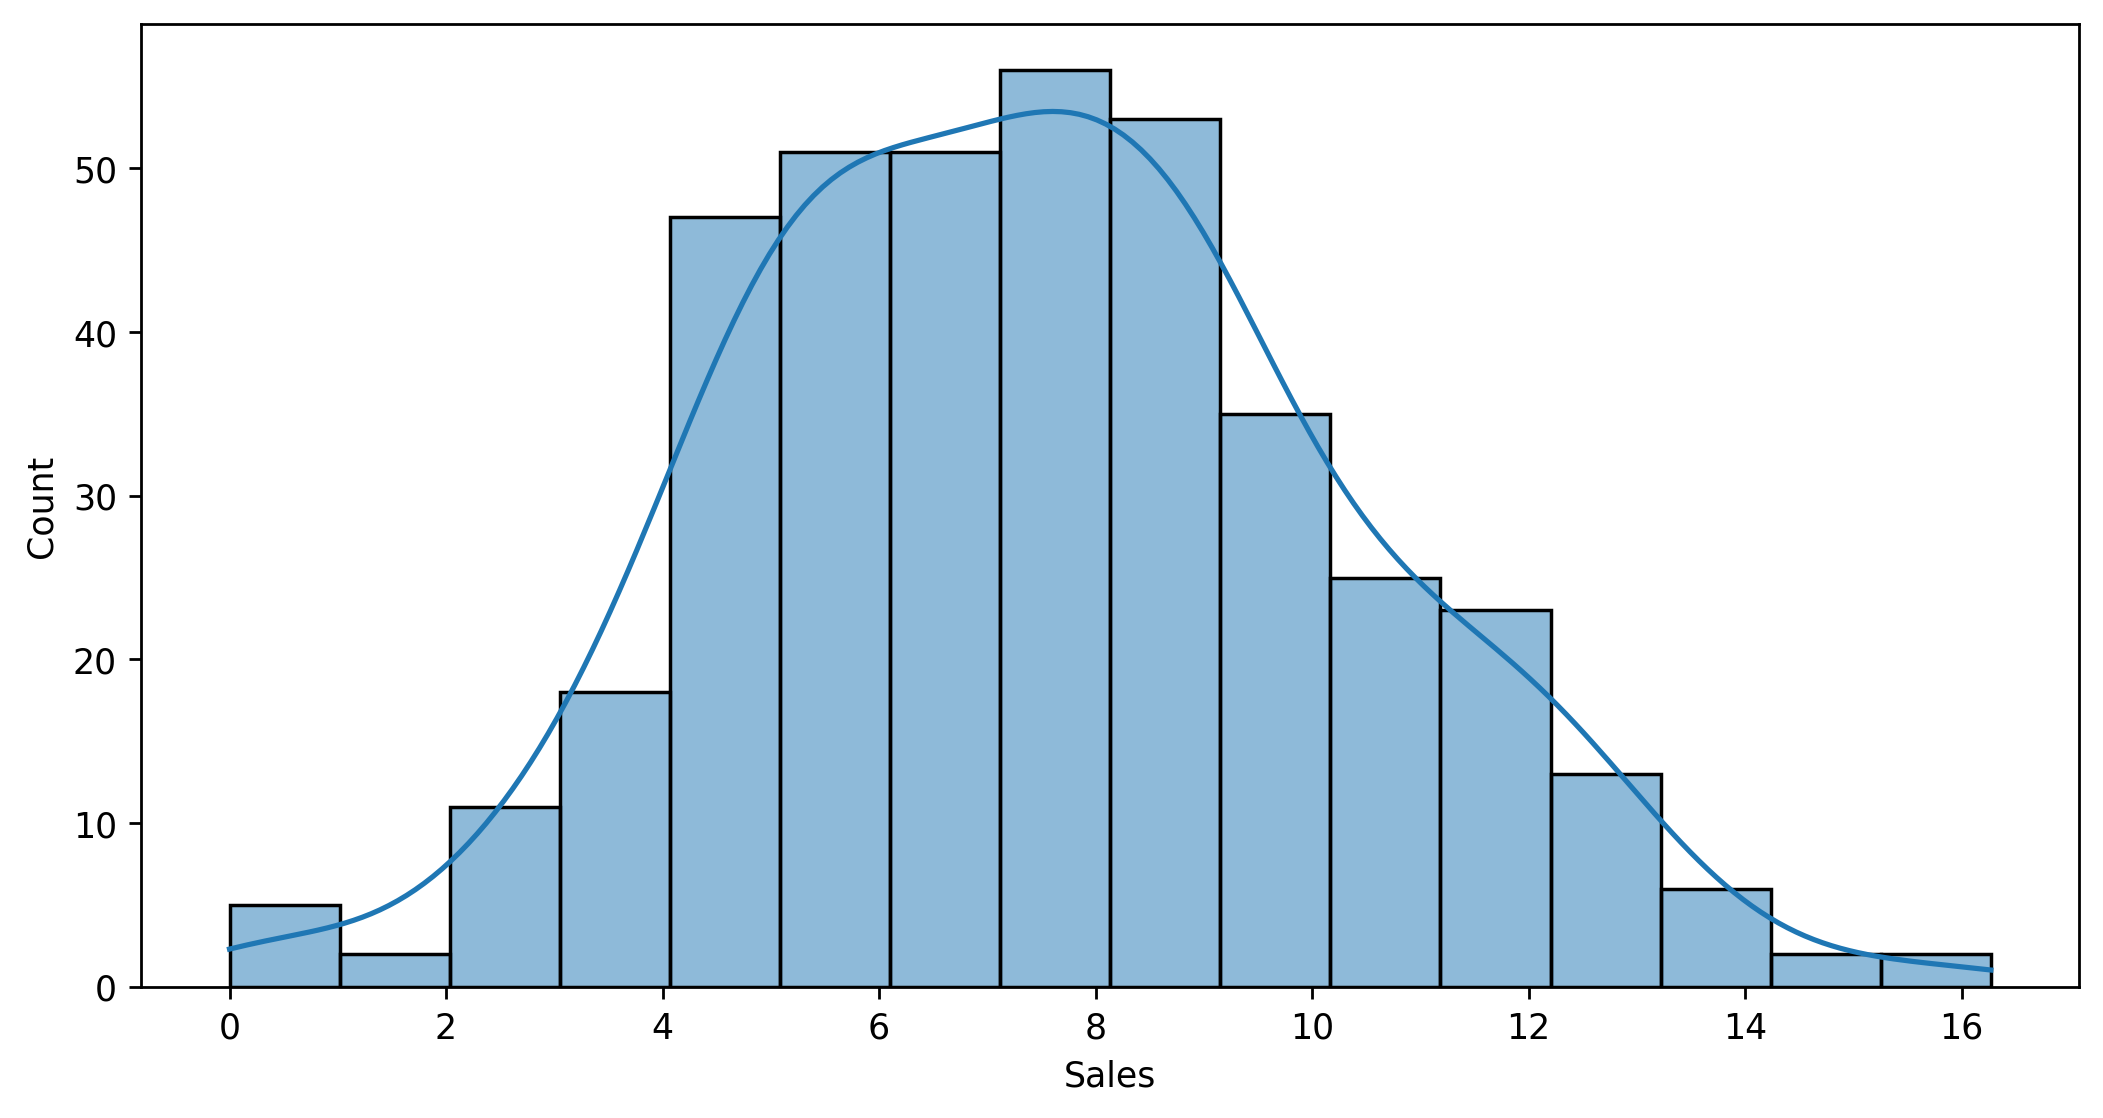

In [15]:
sns.histplot(df['Sales'], kde = True)

<AxesSubplot:xlabel='ShelveLoc', ylabel='count'>

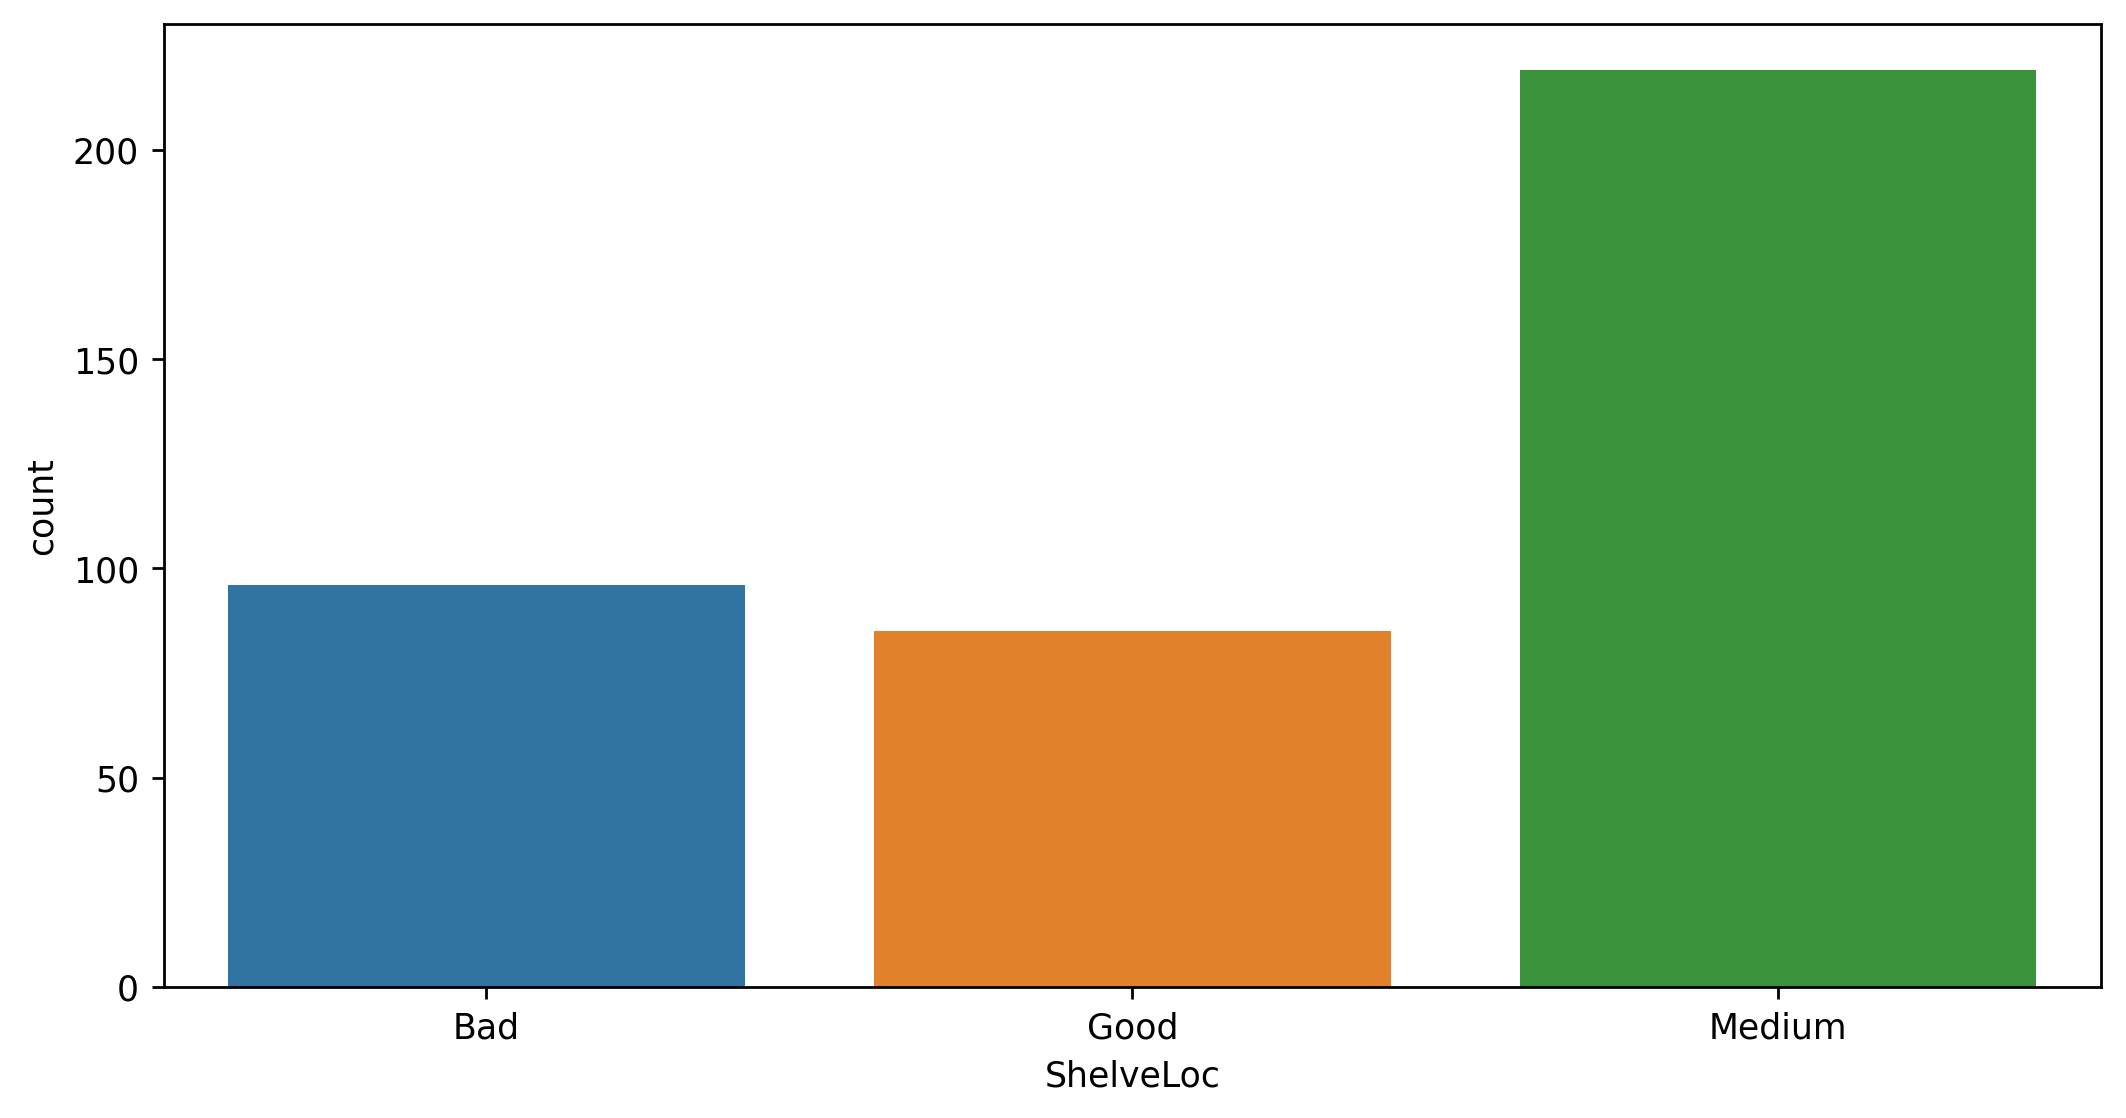

In [16]:
sns.countplot(df['ShelveLoc'])

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

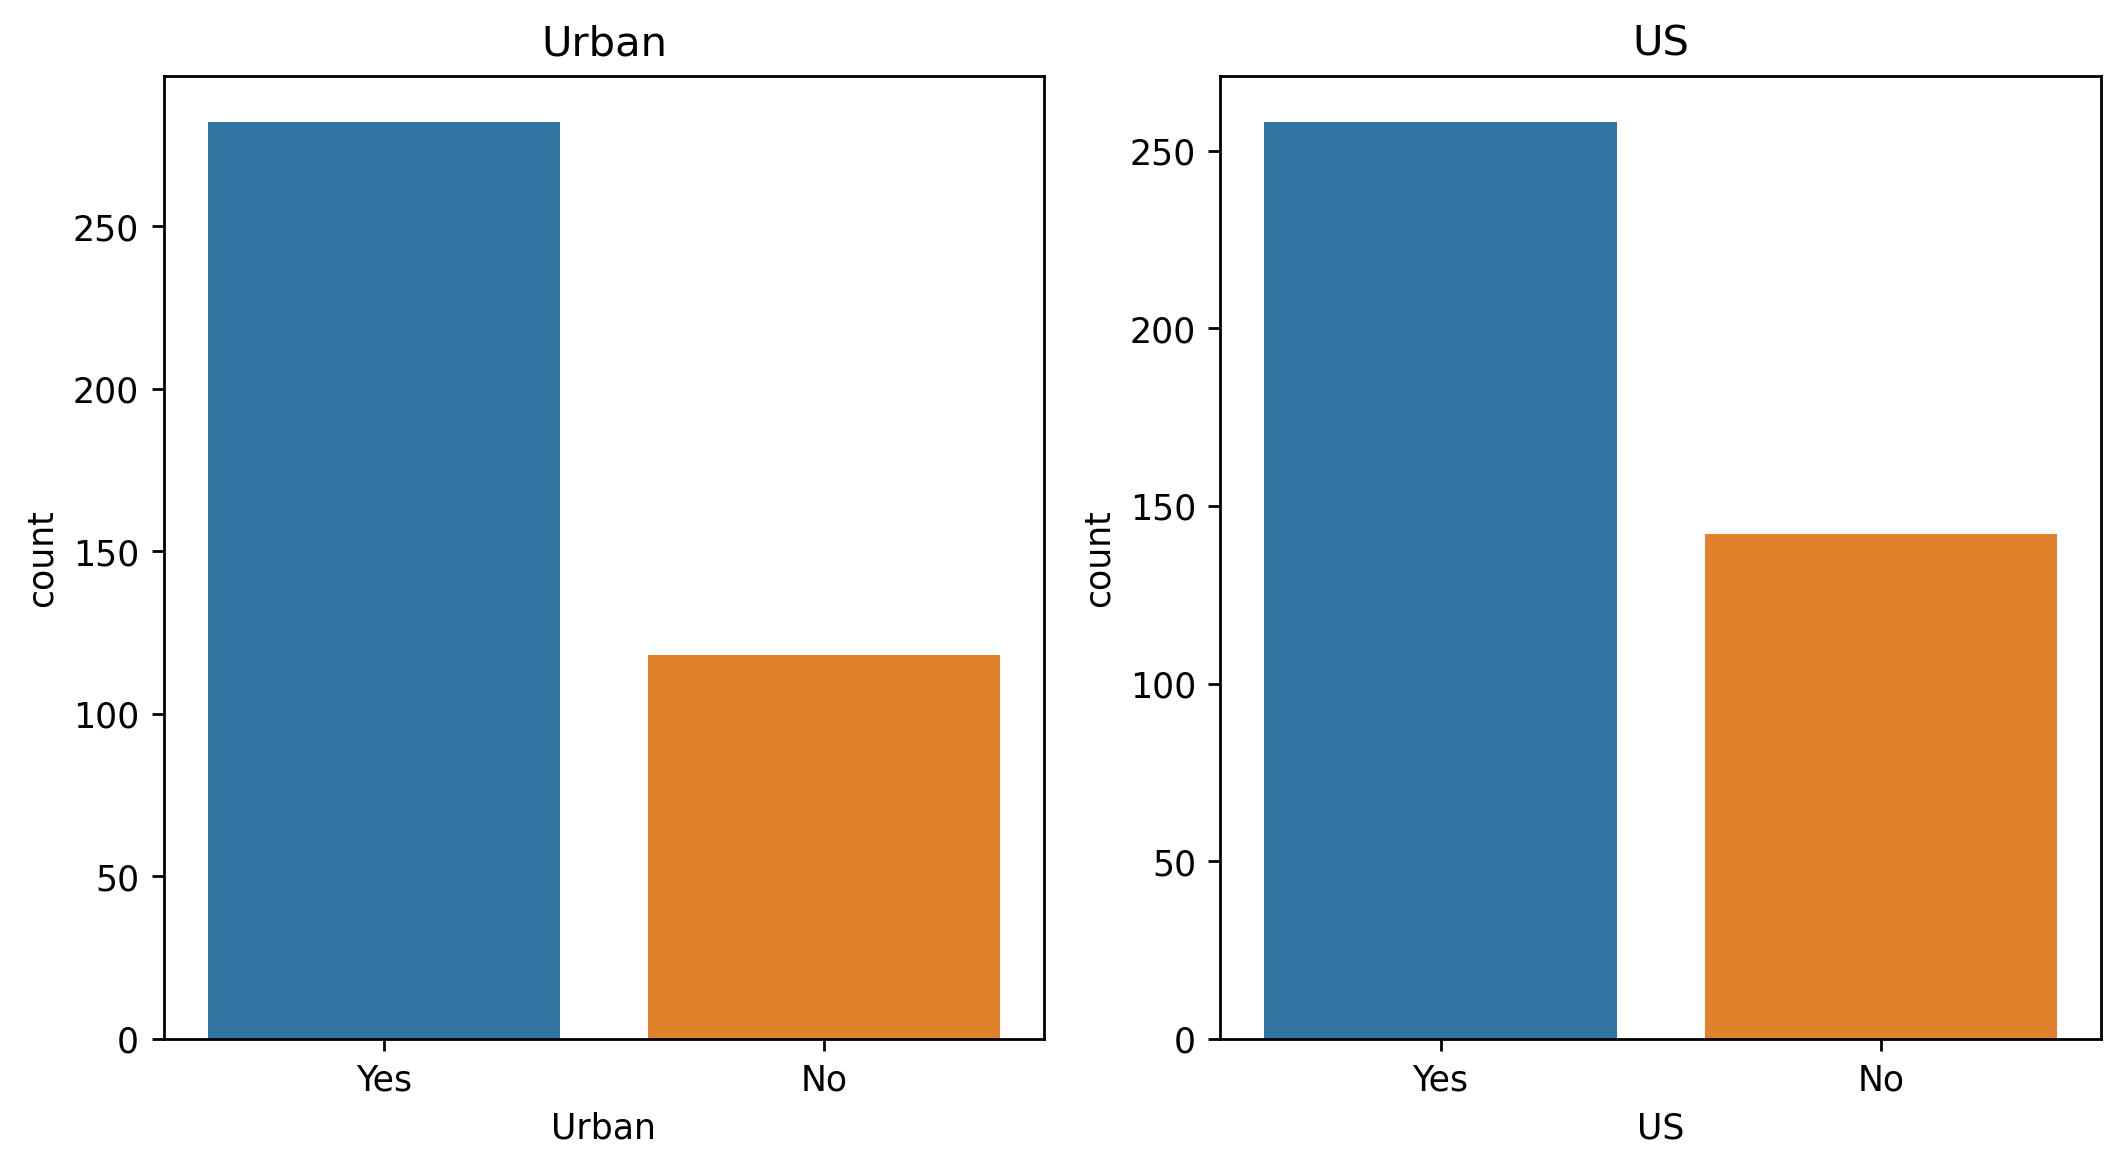

In [20]:
plt.subplot(1,2,1)
sns.countplot(df['Urban'])
plt.title('Urban')

plt.subplot(1,2,2)
sns.countplot(df['US'])
plt.title('US')
plt.tight_layout

In [21]:
df.corr()

Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.064079  0.151951     0.269507    0.050471 -0.444951   
CompPrice    0.064079   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       0.151951  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.269507  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.050471  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price       -0.444951   0.584848 -0.056698     0.044537   -0.012144  1.000000   
Age         -0.231815  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education   -0.051955   0.025197 -0.056855    -0.033594   -0.106378  0.011747   

                  Age  Education  
Sales       -0.231815  -0.051955  
CompPrice   -0.100239   0.025197  
Income      -0.004670  -0.056855  
Advertising -0.004557  -0.033594  
Population  -0.042663  -0.106378  
Price       -0.102177   0.011747  
Age          1.000000   0.006488  
Education    0.006488   1.000000

<AxesSubplot:>

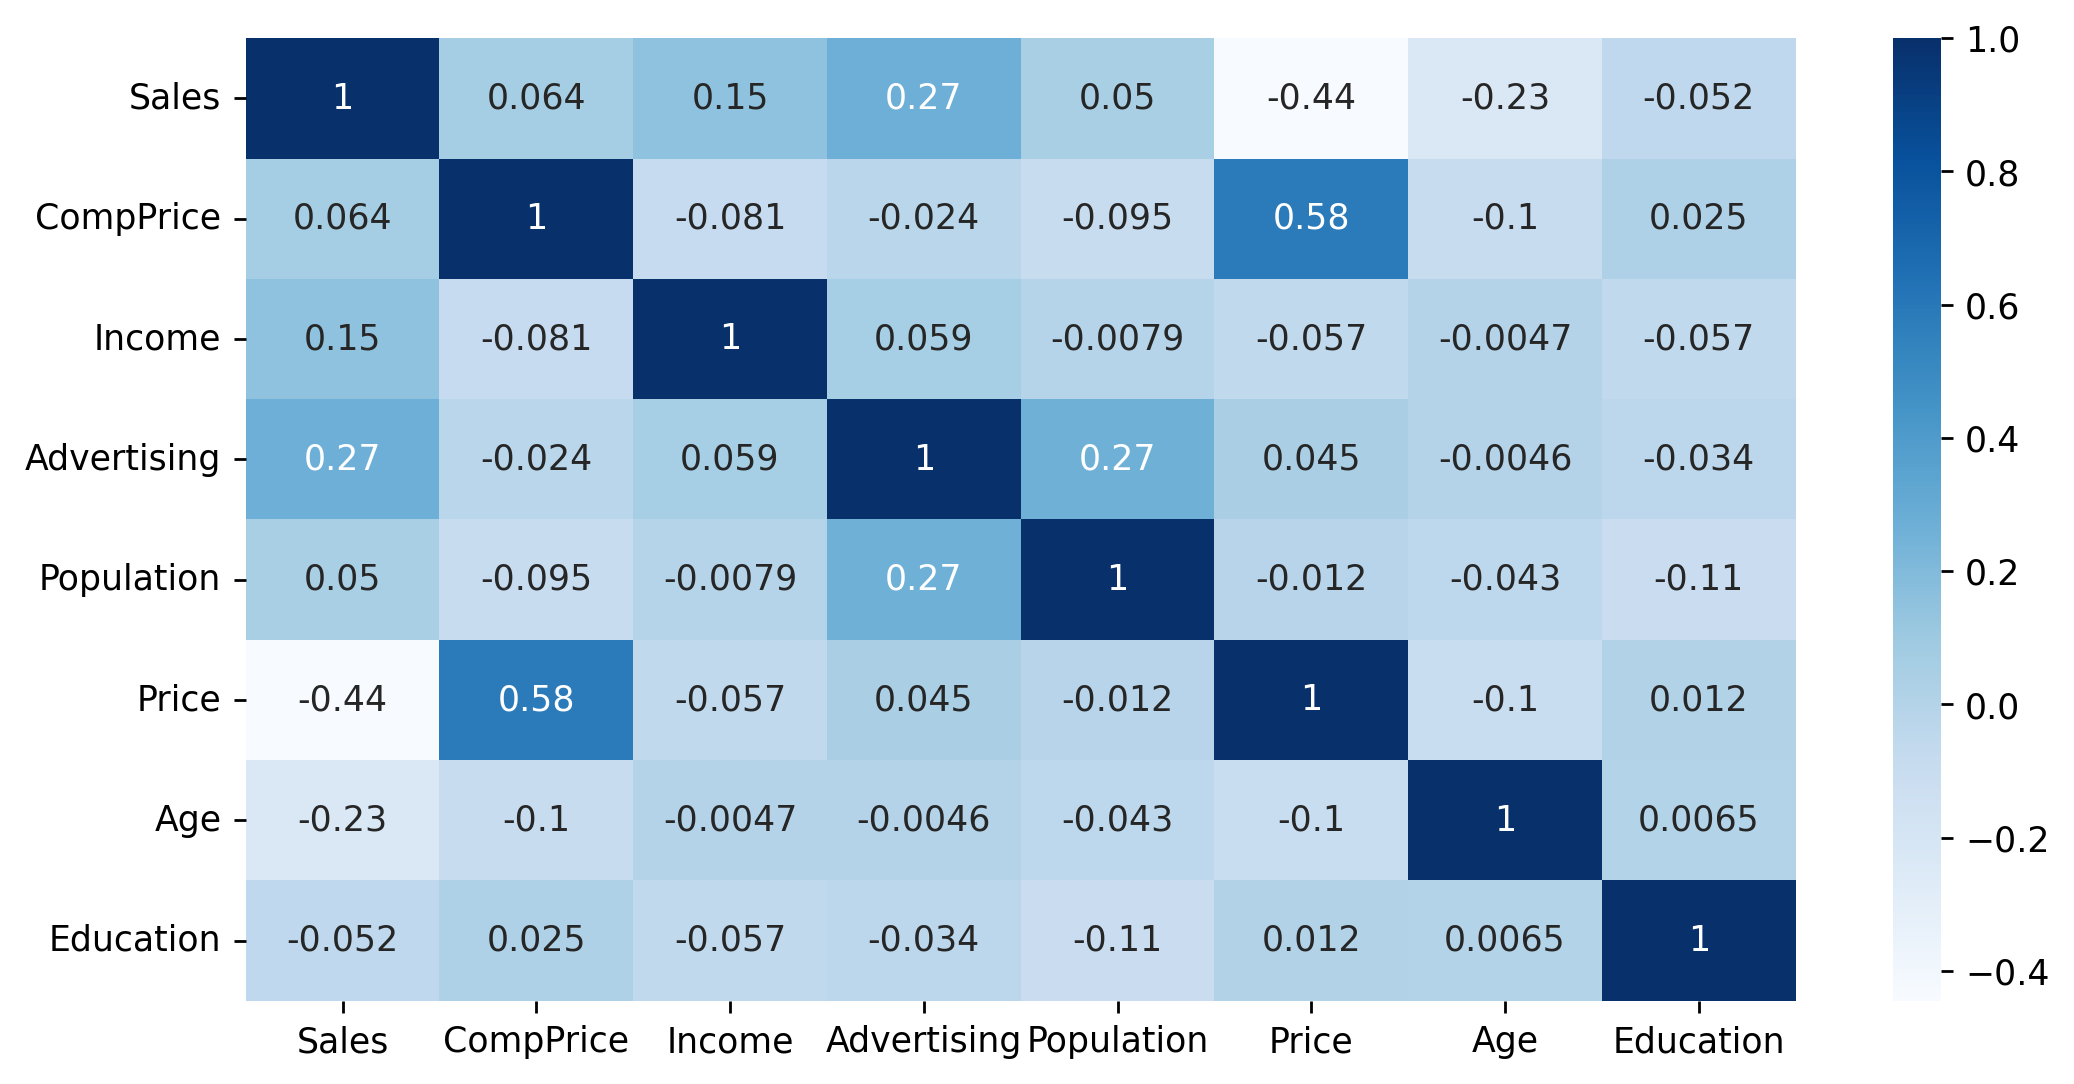

In [26]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

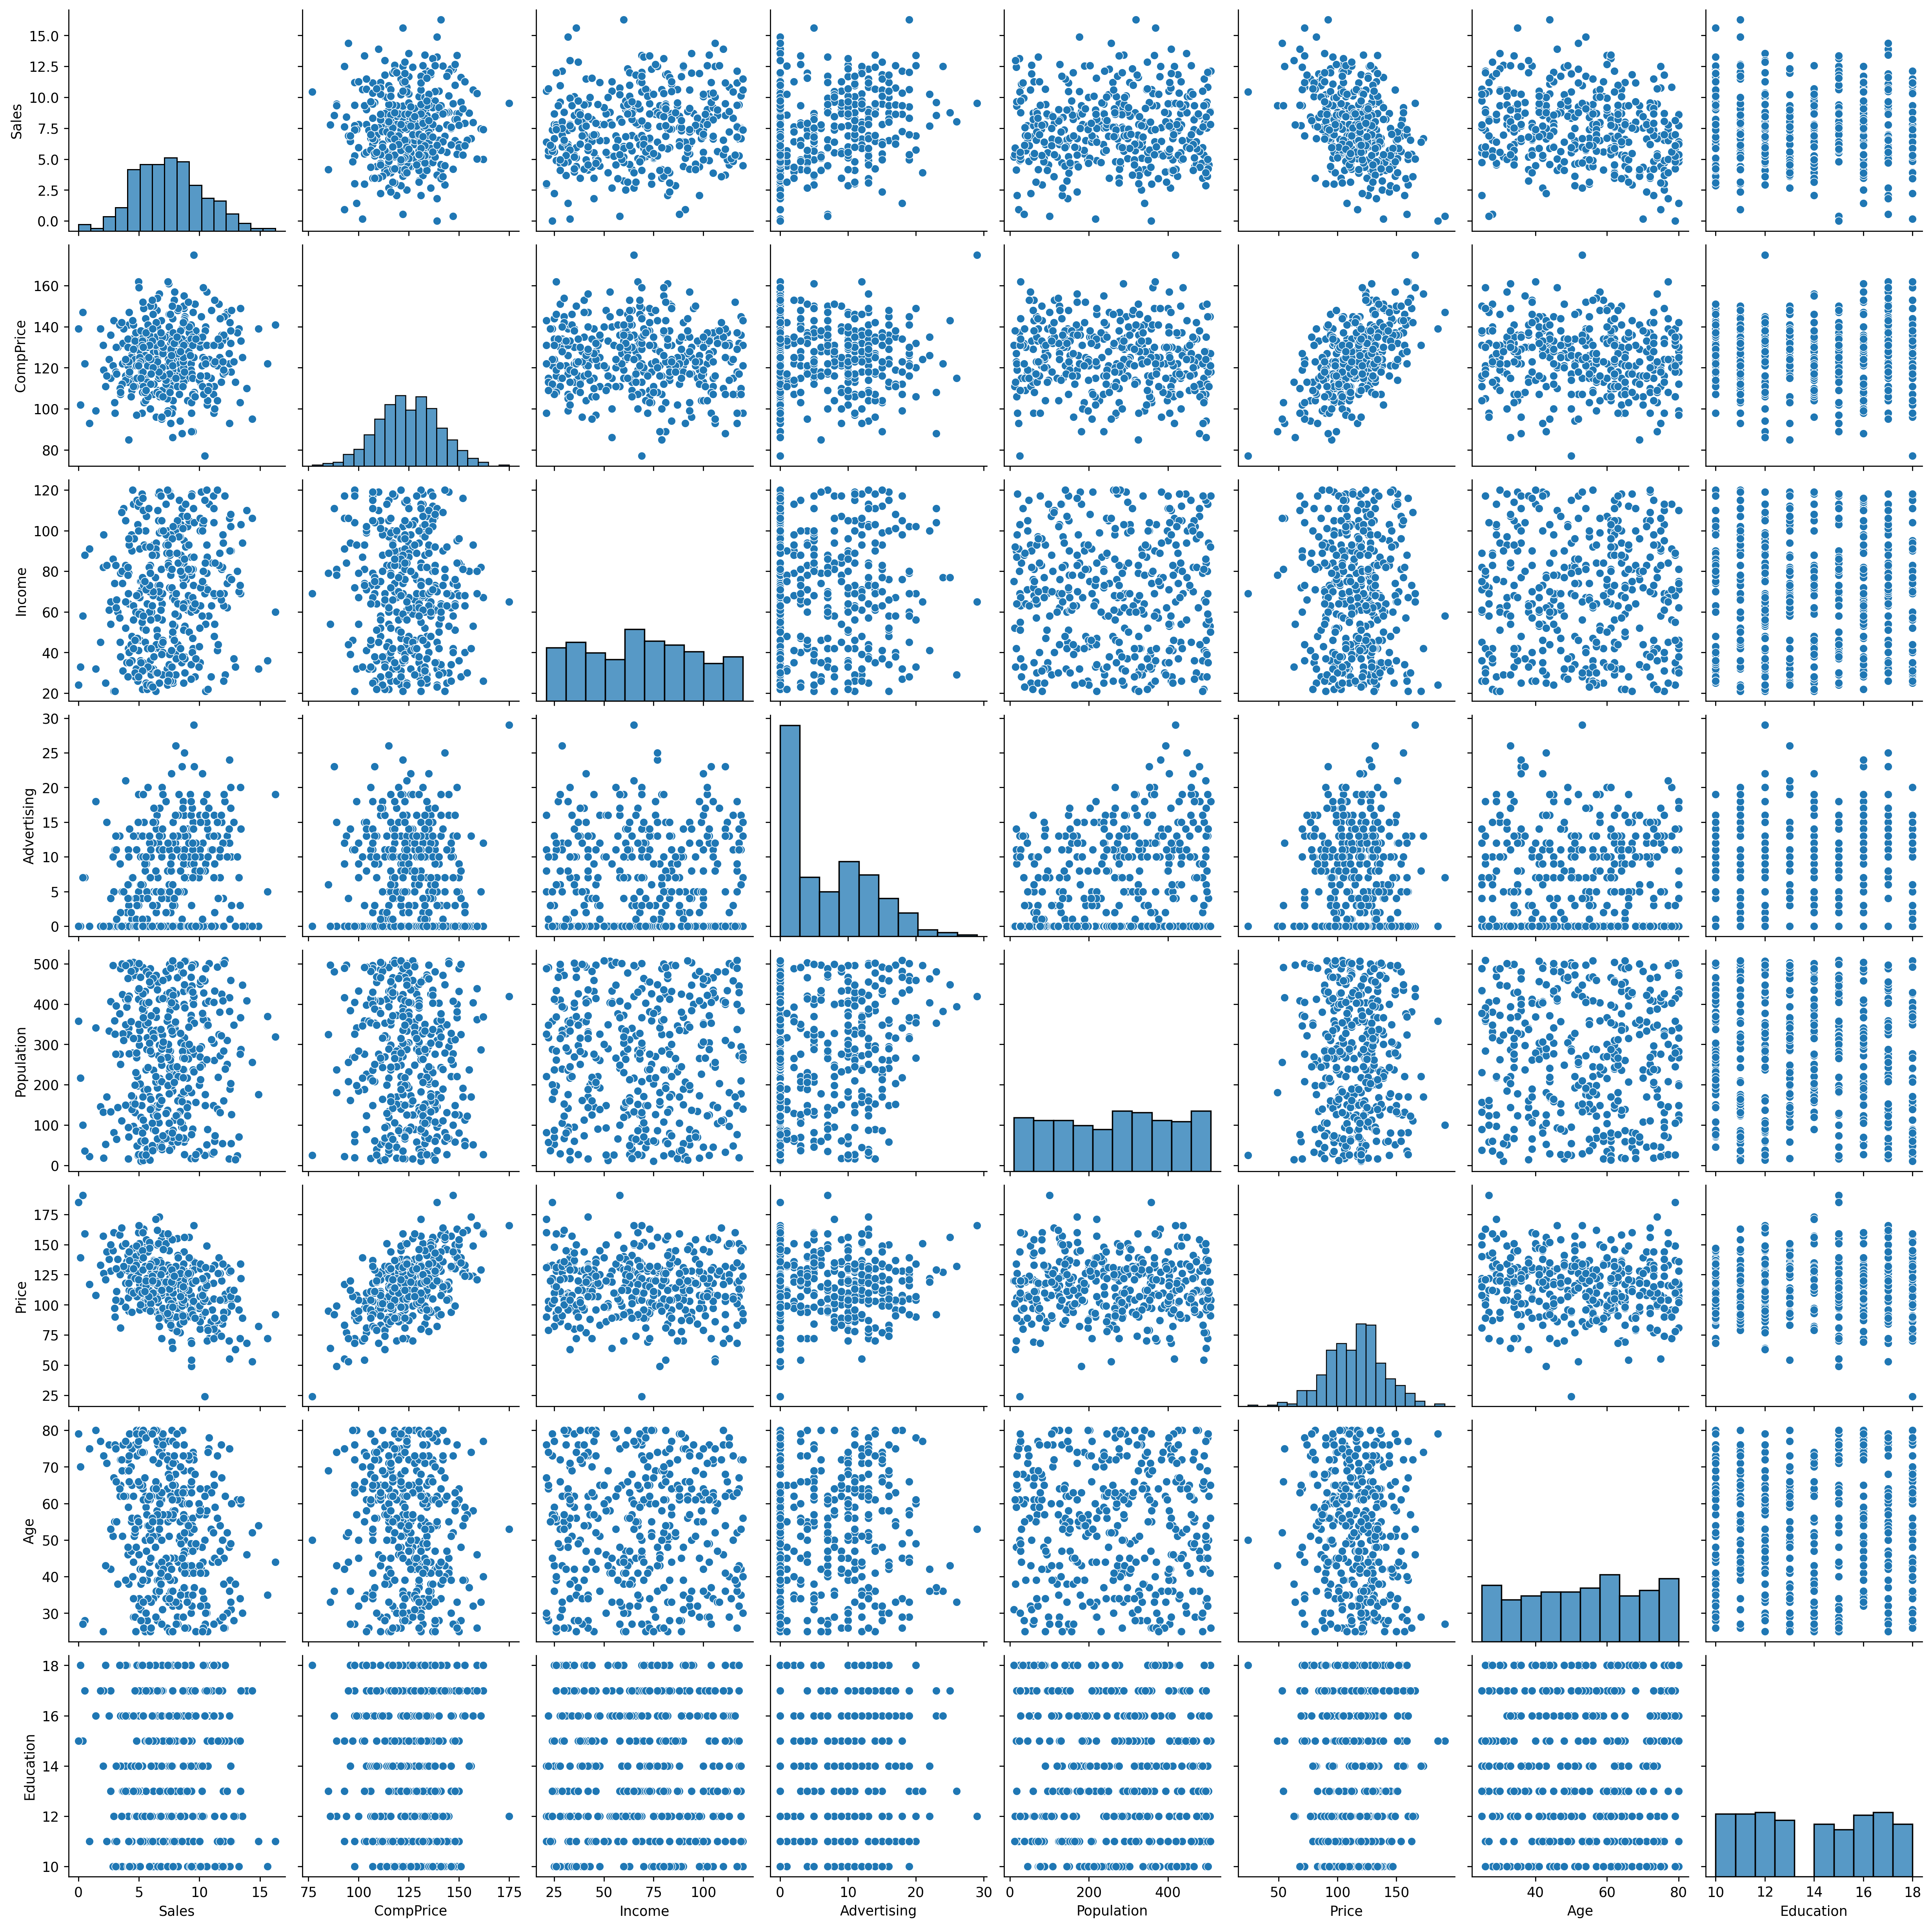

In [27]:
sns.pairplot(df)

In [28]:
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

- As per the problem statement, target variable is sales and we need to convert it into categorical 
  variable.
  
  
- In sales column, maximum sale value is 16.27k


- To convert it into categorical variable we need to assign classes to a particular range of sales.


- If we divide it into 3 classes, (16.27/3 = 5.42) then we can differentiate it as:

  - sales < 5.5 = Low
  - 5.5 < sales < 11 = Medium
  - sales > 11 = High

In [29]:
Class = []

for i in df['Sales']:
    if i < 5.5:
        Class.append('Low')
    elif 5.5 < i < 11:
        Class.append('Medium')
    else:
        Class.append('High')

In [30]:
Class

['Medium',
 'High',
 'Medium',
 'Medium',
 'Low',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'Low',
 'Medium',
 'High',
 'Low',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'High',
 'High',
 'Medium',
 'Medium',
 'High',
 'Low',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'Low',
 'Low',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'Low',
 'High',
 'Medium',
 'Low',
 'Medium',
 'Low',
 'Low',
 'Medium',
 'Medium',
 'Low',
 'Low',
 'Low',
 'High',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Low',
 'Medium',
 'Medium',
 'Low',
 'Medium',
 'High',
 'Low',
 'Low',
 'Low',
 'Medium',
 'Medium',
 'Low',
 'Medium',
 'Medium',
 'Low',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'Low',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'Low',
 'Low',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'Low',
 'Low',
 'Low',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'Low',
 'Low',
 'Medium',
 'Low

In [31]:
# Drop sales column

In [32]:
df = df.drop(columns = 'Sales', axis = 1)
df

CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0          138      73           11         276    120       Bad   42   
1          111      48           16         260     83      Good   65   
2          113      35           10         269     80    Medium   59   
3          117     100            4         466     97    Medium   55   
4          141      64            3         340    128       Bad   38   
..         ...     ...          ...         ...    ...       ...  ...   
395        138     108           17         203    128      Good   33   
396        139      23            3          37    120    Medium   55   
397        162      26           12         368    159    Medium   40   
398        100      79            7         284     95       Bad   50   
399        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 10 columns]

In [33]:
df['Class'] = Class
df

CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0          138      73           11         276    120       Bad   42   
1          111      48           16         260     83      Good   65   
2          113      35           10         269     80    Medium   59   
3          117     100            4         466     97    Medium   55   
4          141      64            3         340    128       Bad   38   
..         ...     ...          ...         ...    ...       ...  ...   
395        138     108           17         203    128      Good   33   
396        139      23            3          37    120    Medium   55   
397        162      26           12         368    159    Medium   40   
398        100      79            7         284     95       Bad   50   
399        134      37            0          27    120      Good   49   

     Education Urban   US   Class  
0           17   Yes  Yes  Medium  
1           10   Yes  Yes    High  
2           12   Yes  Yes  Medium  
3           14   Yes  Yes  Medium  
4           13   Yes   No     Low  
..         ...   ...  ...     ...  
395         14   Yes  Yes    High  
396         11    No  Yes  Medium  
397         18   Yes  Yes  Medium  
398         12   Yes  Yes  Medium  
399         16   Yes  Yes  Medium  

[400 rows x 11 columns]

In [34]:
# Ordinal encoder for independent variable

In [35]:
oe = OrdinalEncoder()

df[['ShelveLoc', 'Urban', 'US']] = oe.fit_transform(df[['ShelveLoc', 'Urban', 'US']])
df

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120        0.0   42   
1          111      48           16         260     83        1.0   65   
2          113      35           10         269     80        2.0   59   
3          117     100            4         466     97        2.0   55   
4          141      64            3         340    128        0.0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128        1.0   33   
396        139      23            3          37    120        2.0   55   
397        162      26           12         368    159        2.0   40   
398        100      79            7         284     95        0.0   50   
399        134      37            0          27    120        1.0   49   

     Education  Urban   US   Class  
0           17    1.0  1.0  Medium  
1           10    1.0  1.0    High  
2           12    1.0  1.0  Medium  
3           14    1.0  1.0  Medium  
4           13    1.0  0.0     Low  
..         ...    ...  ...     ...  
395         14    1.0  1.0    High  
396         11    0.0  1.0  Medium  
397         18    1.0  1.0  Medium  
398         12    1.0  1.0  Medium  
399         16    1.0  1.0  Medium  

[400 rows x 11 columns]

In [36]:
# Model building

In [37]:
x = df.iloc[:,0:-1]
y = df['Class']

In [38]:
# Label encoder for targer variable

In [39]:
le = LabelEncoder()

le.fit_transform(y)

array([2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0,
       2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 1, 2, 2, 2,

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [42]:
# Using C5.0

In [43]:
dt = DecisionTreeClassifier(criterion = 'entropy')

dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

        High       0.88      0.78      0.82         9
         Low       0.54      0.67      0.60        21
      Medium       0.80      0.74      0.77        50

    accuracy                           0.73        80
   macro avg       0.74      0.73      0.73        80
weighted avg       0.74      0.72      0.73        80



In [44]:
print('Training Accuracy: ', dt.score(xtrain, ytrain))
print('Testing Accuracy: ', dt.score(xtest, ytest))

Training Accuracy:  1.0
Testing Accuracy:  0.725


In [45]:
# Decision Tree

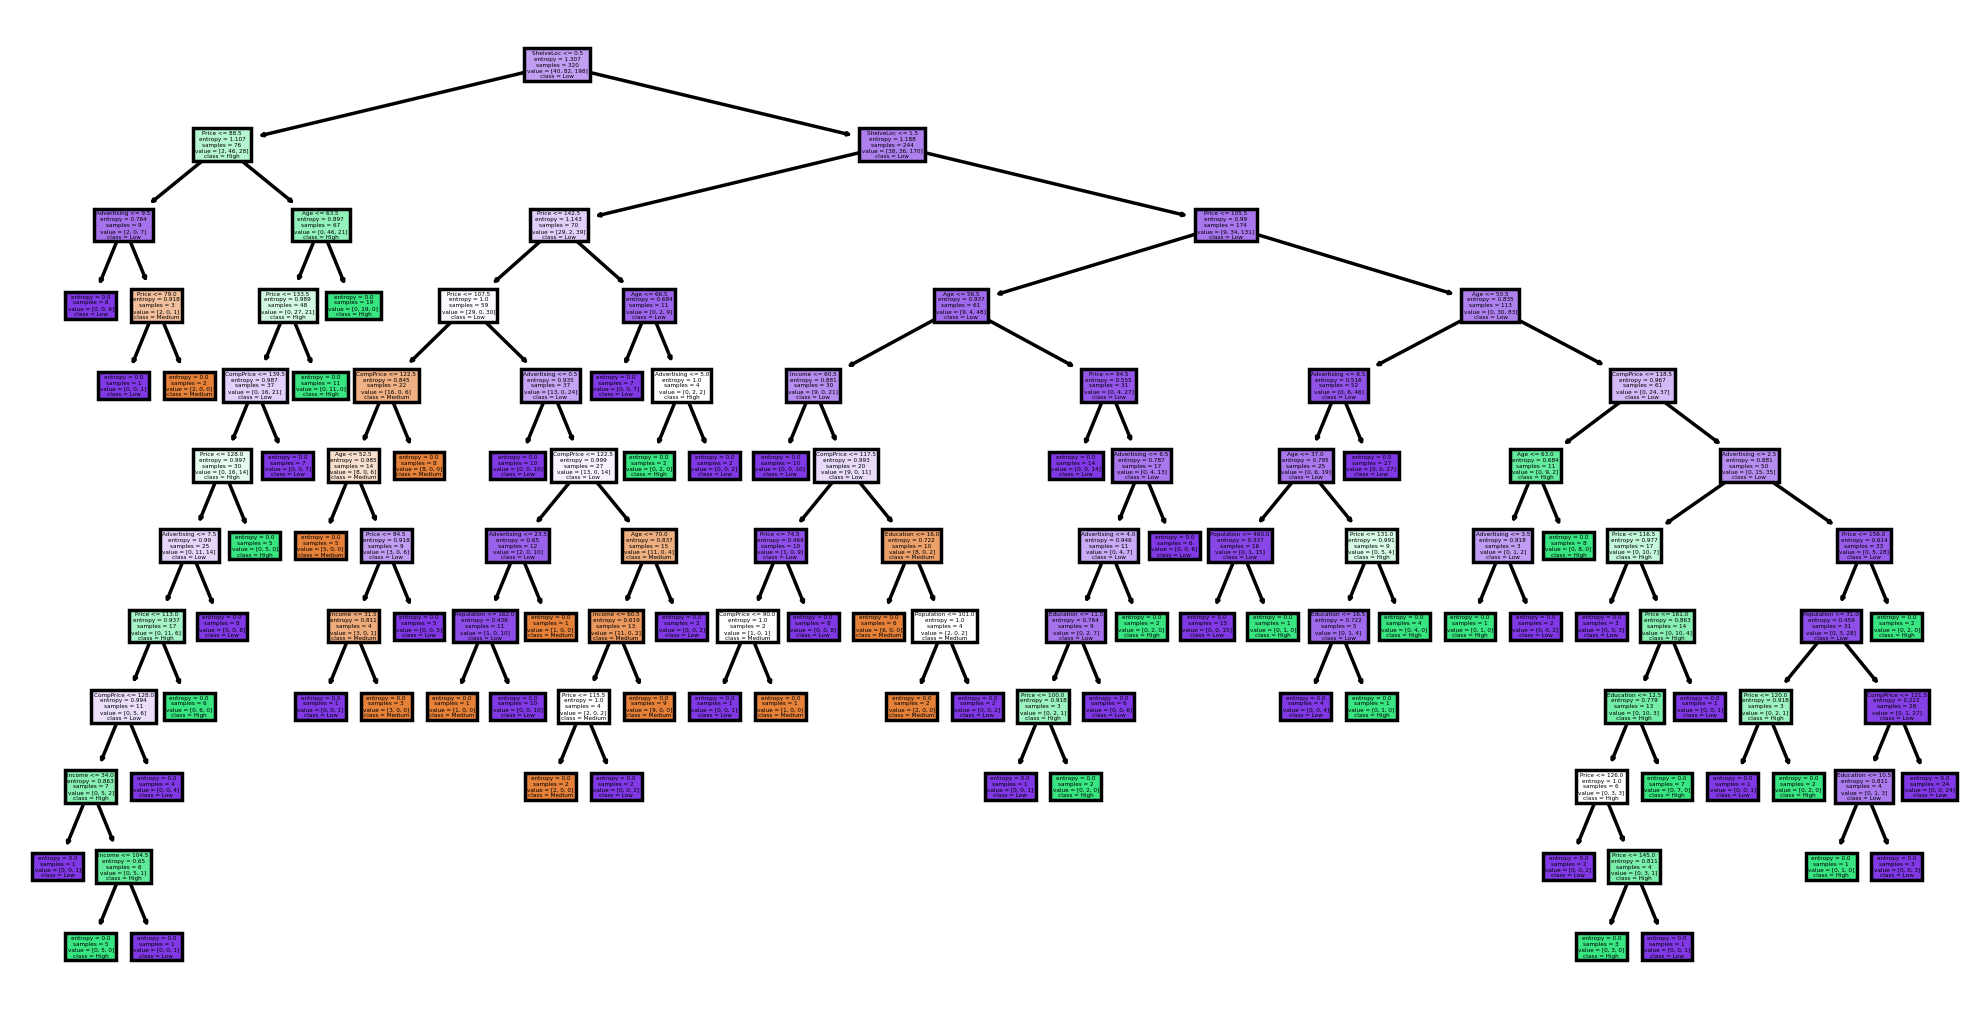

In [47]:
tree.plot_tree(dt, feature_names = x.columns, class_names = df['Class'].unique(), filled = True)
plt.show()

In [48]:
# Using CART - gini impurities

In [49]:
dt1 = DecisionTreeClassifier(criterion = 'gini')

dt1.fit(xtrain, ytrain)
yp1 = dt1.predict(xtest)

print(classification_report(ytest, yp1))

              precision    recall  f1-score   support

        High       0.38      0.33      0.35         9
         Low       0.38      0.48      0.43        21
      Medium       0.65      0.60      0.63        50

    accuracy                           0.54        80
   macro avg       0.47      0.47      0.47        80
weighted avg       0.55      0.54      0.54        80



In [50]:
print('Training Accuracy: ', dt1.score(xtrain, ytrain))
print('Testing Accuracy: ', dt1.score(xtest, ytest))

Training Accuracy:  1.0
Testing Accuracy:  0.5375


In [51]:
# Decision Tree

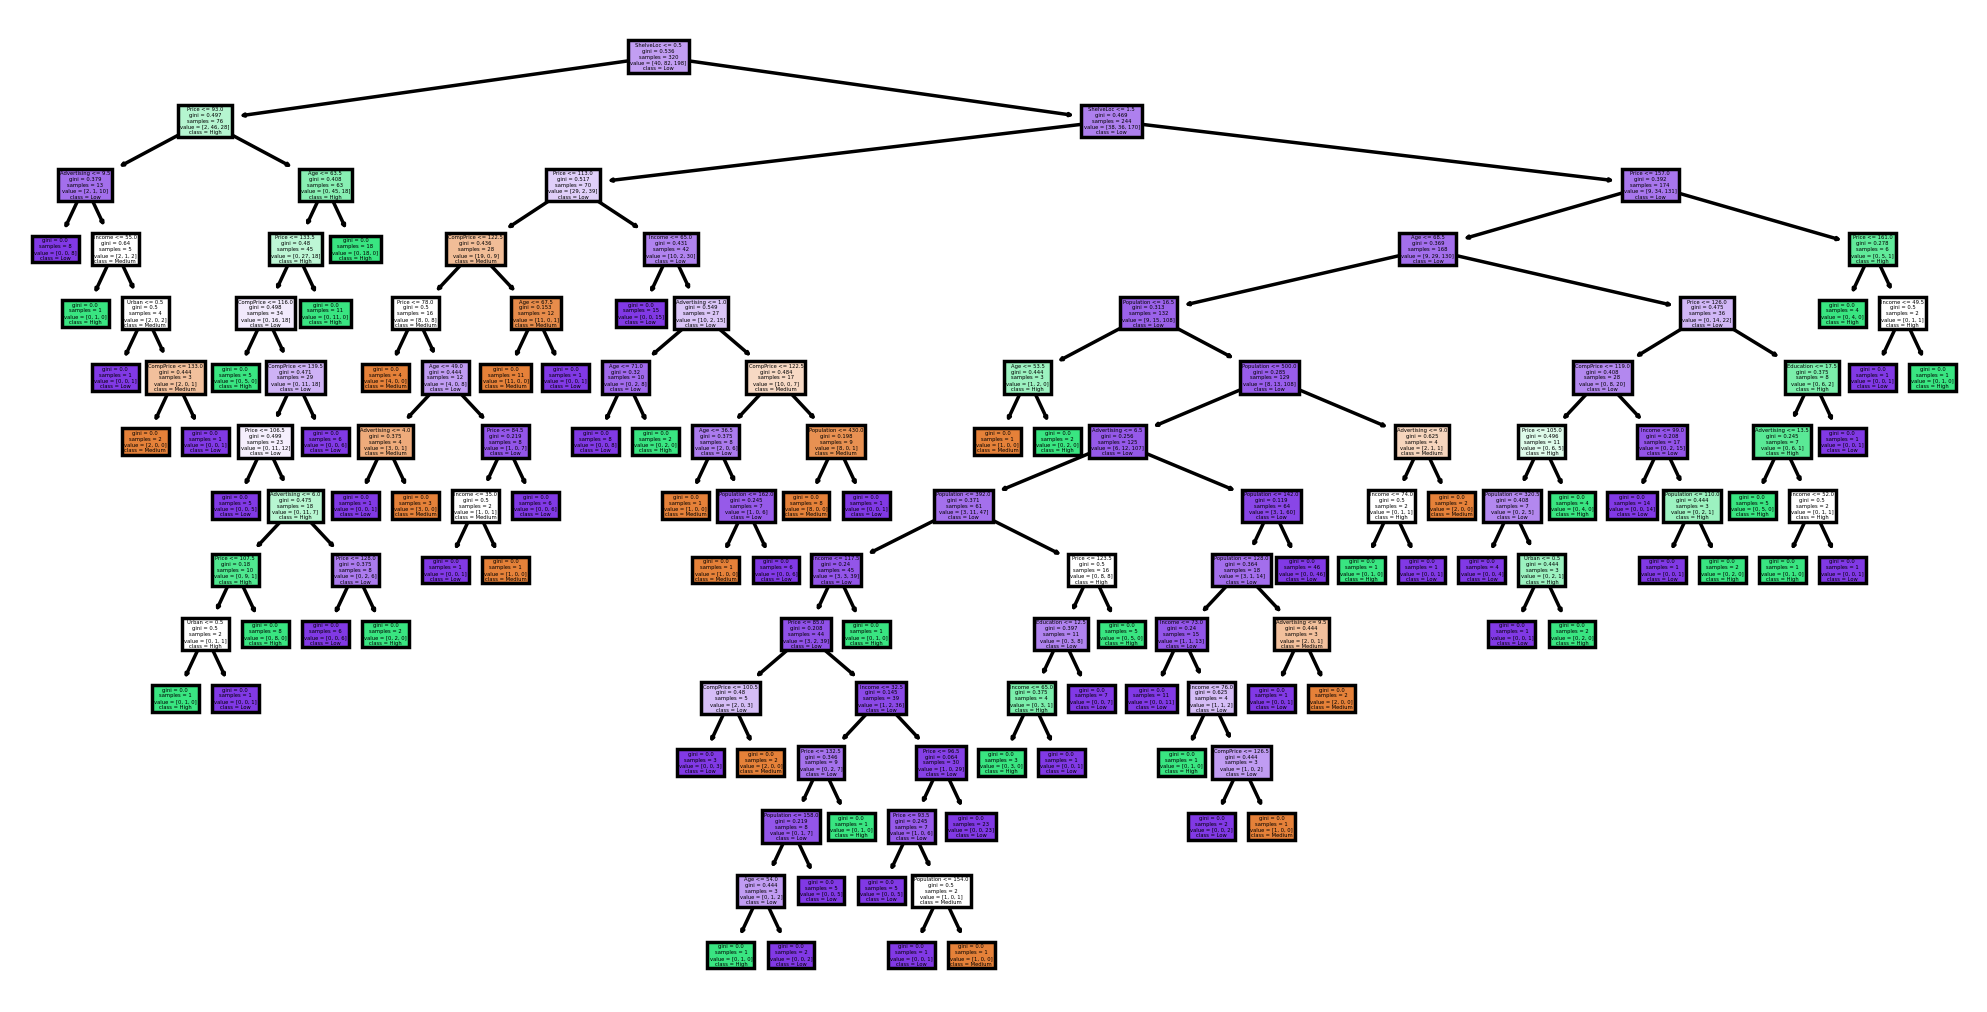

In [52]:
tree.plot_tree(dt1, feature_names = x.columns, class_names = df['Class'].unique(), filled = True)
plt.show()

- Both methods shows Overfitting

In [54]:
# Hyperparameter tuning

In [53]:
from sklearn.model_selection import GridSearchCV

In [55]:
dt2 = DecisionTreeClassifier()

params = {
    'criterion' : ['gini', 'entropy'],
    'splitter'  : ['best', 'random'],
    'max_depth' : [1,2,3,4,5,6,7,8]
}

In [56]:
grid = GridSearchCV(DecisionTreeClassifier(), params)

In [57]:
grid.fit(xtrain, ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']})

In [58]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}

In [59]:
# Building new decision tree model using best parameters

In [60]:
dt3 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, splitter = 'random')

dt3.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=3, splitter='random')

In [61]:
yp3 = dt3.predict(xtest)

print(classification_report(ytest, yp3))

              precision    recall  f1-score   support

        High       0.36      0.44      0.40         9
         Low       0.60      0.29      0.39        21
      Medium       0.66      0.78      0.72        50

    accuracy                           0.61        80
   macro avg       0.54      0.50      0.50        80
weighted avg       0.61      0.61      0.59        80



In [62]:
print('Training Accuracy: ', dt3.score(xtrain, ytrain))
print('Testing Accuracy: ', dt3.score(xtest, ytest))

Training Accuracy:  0.69375
Testing Accuracy:  0.6125


In [63]:
# Decision Tree

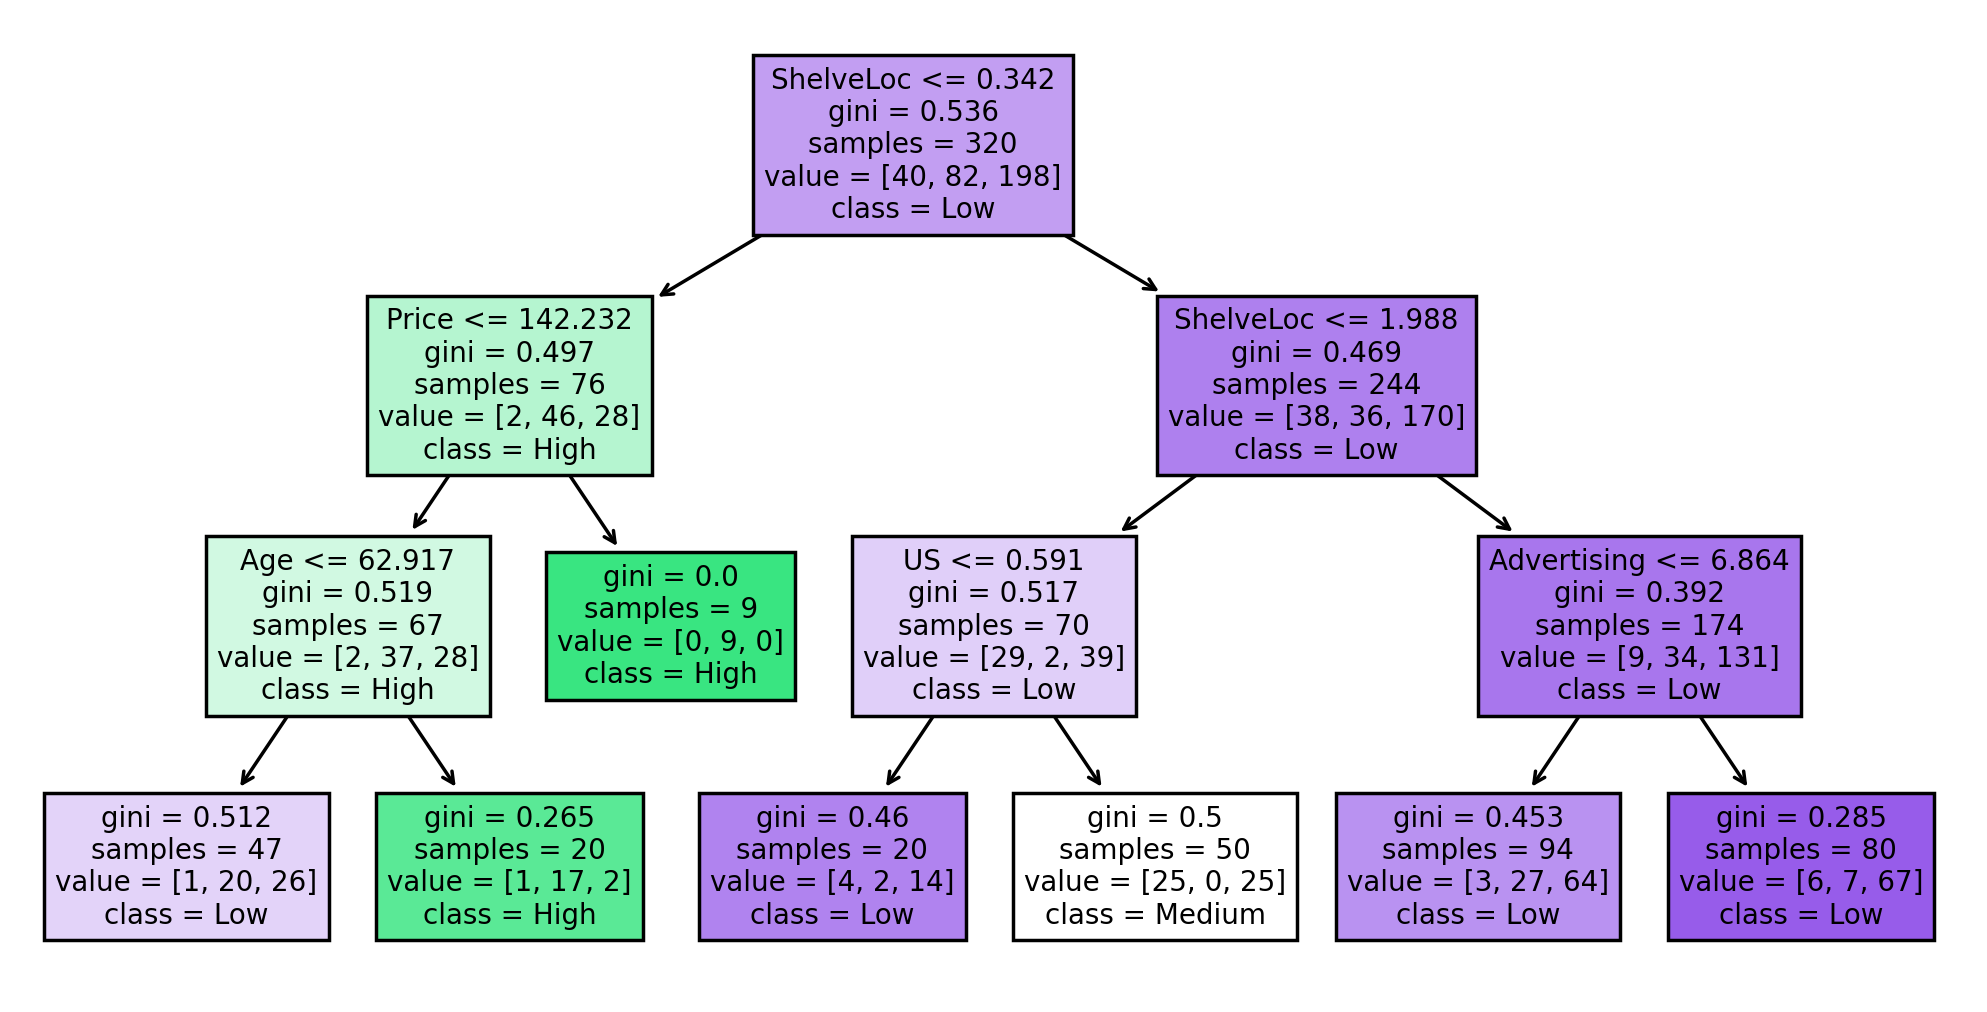

In [64]:
tree.plot_tree(dt3, feature_names = x.columns, class_names = df['Class'].unique(), filled = True)
plt.show()